### *Business Intelligence Solution for 2019 Sales Analysis*

### *Business Understanding*

##### CRISP-DM Outline:

1. Business Understanding:
 Objective:
Analyze the client’s transactional data from 2019 to identify opportunities to drive more sales and improve operational efficiency.

Key Business Questions:
1. How much revenue was generated in 2019?
2. Are there any seasonal trends in the sales data?
3. Which products performed the best and worst?
4. How do sales in different months and weeks compare?
5. Which cities received the most product deliveries?
6. How do different product categories perform in terms of revenue and quantity sold?
7. Identify additional insights to inform business strategies.

Constraints:
Products priced above $99.99 are categorized as "High-Level," while others are "Basic-Level."

2. Data Understanding:
Data Sources:
Excel Files: Sales data from January to June 2019 stored in CSV format.
Database: Sales data from July to December 2019 stored in a remote SQL database.
Data Collection:
Import CSV files for the first 6 months.
Connect to the remote database and extract data for the last 6 months.
Initial Data Exploration:
Check for missing data, inconsistencies, and data types.
Get an overview of sales trends, product lists, pricing, and delivery locations.

3. Data Preparation:
Data Cleaning:
Handle missing values and correct data inconsistencies.
Standardize formats across CSV and database data.
Data Integration:
Combine data from both sources into a unified dataset for the entire year.
Feature Engineering:
Create new features such as product level ("High-Level" or "Basic-Level") based on unit price.
Generate time-based features (e.g., month, week) to analyze trends.
Label and categorize products by their revenue contribution and quantity sold.

4. Modeling:
Sales Analysis:
Calculate total revenue, monthly, and weekly sales comparisons.
Identify seasonality in sales using time-series analysis.
Rank products by sales performance (best-selling vs. worst-selling).
Compare sales across cities and product categories.
Product Categorization:
Apply conditions to label products as "High-Level" or "Basic-Level."
Visualization:
Use visual tools to illustrate trends, seasonality, and comparisons (e.g., bar charts, line graphs, heat maps).

5. Evaluation:
Validation:
Ensure all business questions are addressed with the analysis.
Validate the consistency and accuracy of the data.
Business Insight:
Summarize key findings, such as peak sales periods, top-performing products, and geographic hotspots.
Provide recommendations for increasing sales and improving operational efficiency based on insights.

6. Deployment:
Report Generation:
Create a comprehensive report that answers all key business questions.
Include visualizations and key metrics to support decision-making.
Presentation:
Present the findings to the client, highlighting actionable insights.
BI Solution:
Recommend setting up a dashboard for real-time sales monitoring.
Suggest future data collection improvements for better analysis.
This outline provides a structured approach to solving the client's business problem using the CRISP-DM methodology, ensuring a thorough and systematic analysis of their 2019 sales data.









Overview
This project provides a comprehensive business intelligence solution using Power BI to analyze and visualize a client’s 2019 sales data. The goal is to deliver actionable insights into total revenue, seasonal trends, product performance, city-wise deliveries, and category comparisons, enhancing sales and operational efficiency.

Key Features
- Total Revenue Analysis: Understand the total revenue generated throughout the year.
- Seasonality Trends: Identify seasonal sales patterns and trends.
- Product Performance: Analyze the best and worst-selling products.
- Sales Comparisons: Compare sales data across different months and weeks.
- City-wise Deliveries: Determine which cities received the most deliveries.
- Category Comparisons: Evaluate revenue and quantities for different product categories.
- Product Categorization: Classify products as high-level or basic-level based on unit price.

Methodology: CRISP-DM

  The project follows the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, structured as follows:

- Business Understanding: Define objectives and requirements from the client to drive sales and improve efficiency.
- Data Understanding: Collect and explore the dataset, which includes sales data for 2019 across various months and cities.
- Data Preparation: Clean and transform the data, integrating sources from CSV files and a remote database.
- Modeling: Apply appropriate data analysis techniques to uncover insights.
- Evaluation: Assess the results against business objectives to ensure they meet the client’s needs.
- Deployment: Develop and deploy a Power BI dashboard to visualize the insights.
- Installation
- Clone the repository:
bash
Copy code
git clone https://github.com/yourusername/comprehensive-power-bi-dashboard.git
Navigate to the project directory:
bash
Copy code
cd comprehensive-power-bi-dashboard
Open the Power BI project file (.pbix) using Power BI Desktop.
Usage
Open the Power BI file in Power BI Desktop.
Explore various dashboard pages, including Total Revenue, Seasonal Trends, Product Performance, City-wise Deliveries, and Category Comparisons.
Use interactive filters and visuals to derive insights from the data.
Contributing

### *Data Understanding*

### *Import Libraries*

In [3]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu


#database connection
import pyodbc
from dotenv import dotenv_values

# hide warning
import warnings
warnings.filterwarnings('ignore')


### Setup Connections

In [4]:
# load environment variable from .env file
environment_variables =dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
 
connection = pyodbc.connect(connection_string)

### Data loading 

### Load datasets from the excel file

In [5]:
january_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_January_2019.csv')
january_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
febuary_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_February_2019.csv')
febuary_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [7]:
march_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_March_2019.csv')
march_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [8]:
april_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_April_2019.csv')
april_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
may_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_May_2019.csv')
may_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [10]:
june_data = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/capstone/Analysis-on-2019-transactional-data/data/Sales_June_2019.csv')
june_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


### Concatenate all the data in the excel file and name is csv_data

In [11]:
csv_data = pd.concat([january_data,febuary_data,march_data,april_data,may_data,june_data],axis=0)
# convert to dataframe
csv_df = pd.DataFrame(csv_data)
csv_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### *Laod the datasets from the database*

In [12]:
query = "SELECT * FROM dbo.Sales_July_2019"

july_data = pd.read_sql(query,connection)
july_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
query = "SELECT * FROM dbo.Sales_August_2019"

august_data = pd.read_sql(query,connection)
august_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [14]:
query = "SELECT * FROM dbo.Sales_September_2019"

september_data = pd.read_sql(query,connection)
september_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [15]:
query = "SELECT * FROM dbo.Sales_October_2019"

october_data = pd.read_sql(query,connection)
october_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [16]:
query = "SELECT * FROM dbo.Sales_November_2019"

november_data = pd.read_sql(query,connection)
november_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [17]:
query = "SELECT * FROM dbo.Sales_December_2019"

december_data = pd.read_sql(query,connection)
december_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


### concatenate all the dataset from the sql database and name it database_data


In [18]:
sql_data = pd.concat([july_data,august_data,september_data,october_data,november_data,december_data],axis=0)
sql_df = pd.DataFrame(sql_data)
sql_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


#### *Exploratory Data Analysis*


In [19]:
# explore the csv_data
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [20]:
csv_df.describe().T

,count,unique,top,freq
Order ID,85380,81677,Order ID,160
Product,85380,20,USB-C Charging Cable,9952
Quantity Ordered,85380,9,1,77205
Price Each,85380,23,11.95,9952
Order Date,85380,66474,Order Date,160
Purchase Address,85380,72960,Purchase Address,160


In [21]:
csv_df.duplicated().sum()

np.int64(511)

In [22]:
# check for unique value,number of unique values and missing values
def print_unique_values_and_count(df, columns):
    for column in columns:
        unique_values = df[column].unique()
        num_unique = unique_values.size
        missing_values = df[column].isnull().sum()
        num_duplicates = df[column].duplicated().sum()
        
        print(f"Column: {column}")
        print("Unique values:", unique_values)
        print(f"Number of unique values: {num_unique}")
        print(f"Missing values: {missing_values}")
        print(f"number of duplicates: {num_duplicates}")
        print("-" * 40)


In [23]:
# print for each columns
columns_to_check_in_csv_df = ["Order ID","Product", "Price Each", "Purchase Address", "Quantity Ordered","Order Date"]
print_unique_values_and_count(csv_df, columns_to_check_in_csv_df)

Column: Order ID
Unique values: ['141234' '141235' '141236' ... '222907' '222908' '222909']
Number of unique values: 81678
Missing values: 245
number of duplicates: 3947
----------------------------------------
Column: Product
Unique values: ['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Number of unique values: 21
Missing values: 245
number of duplicates: 85604
----------------------------------------
Column: Price Each
Unique values: ['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0']
Number o

##### Insight on csv_df

- The csv_df contain 6 columns and 85625 rows
- The number of order id is 85380
- The csv_df all the columns except the product are not in the right datatype format
- There are 20 unique products that where ordered with USB-C charging cable been the most ordered product
- The dataset contain 81677 unique Order ID ,this indicates that there are multiple duplicate in the dataframe resulting to 3947 duplicates 
- The fact that a quantity of 1 is the most common (77,205 occurrences) suggests that most transactions are for single items.
- The price and quantity ordered columns contain non numeric values.
- The product column also contain missing values


In [24]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [25]:
# summary statistics of the dataset
sql_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,100730.0,NaN,NaN,NaN,271309.400338,27917.487448,222910.0,247141.25,271335.5,295475.75,319670.0
Product,100925,20,USB-C Charging Cable,11951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity_Ordered,100730.0,NaN,NaN,NaN,1.124432,0.44642,1.0,1.0,1.0,1.0,9.0
Price_Each,100730.0,NaN,NaN,NaN,183.043312,332.133484,2.99,11.95,14.95,150.0,1700.0
Order_Date,100730,75922,2015-12-19 20:16:00.0000000,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase_Address,100925,84781,Purchase Address,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# check for unique values,number of unique values and missing values in sql_df
columns_to_check_in_sql_df = ["Order_ID","Product", "Price_Each", "Purchase_Address", "Quantity_Ordered","Order_Date"]
print_unique_values_and_count(sql_df, columns_to_check_in_sql_df)

Column: Order_ID
Unique values: [222910. 222911. 222912. ... 319668. 319669. 319670.]
Number of unique values: 96762
Missing values: 495
number of duplicates: 4463
----------------------------------------
Column: Product
Unique values: ['Apple Airpods Headphones' 'Flatscreen TV' 'AA Batteries (4-pack)'
 'AAA Batteries (4-pack)' 'Bose SoundSport Headphones' 'Google Phone'
 'LG Dryer' 'USB-C Charging Cable' 'Lightning Charging Cable'
 '34in Ultrawide Monitor' 'Wired Headphones' 'Vareebadd Phone'
 '27in FHD Monitor' '20in Monitor' 'ThinkPad Laptop'
 '27in 4K Gaming Monitor' 'Macbook Pro Laptop' 'iPhone' None
 'LG Washing Machine' 'Product']
Number of unique values: 21
Missing values: 300
number of duplicates: 101204
----------------------------------------
Column: Price_Each
Unique values: [ 150.          300.            3.83999991    2.99000001   99.98999786
  600.           11.94999981   14.94999981  379.98999023   11.98999977
  400.          149.99000549  109.98999786  999.98999023  38

#### Insight on sql_df

- The sql_df contains 6 columns and 101225 row 
- The number of order id is 100730 with no missing values
- There are 96762 unique order Id, this shows that there are multiple entries for some product resulting to 4463 duplicates.
- The sql_df also contain columns with unmatching datatype such as the order_id, quantity ordered,order date.
- 75% 0f quantity ordered by cutomers are 1 which makes it the minimum quantity ordered while 9 is the maximum quatity ordered (this shows that customers primarily purchase single items )
- 0.45 standard deviation indicates that the majority of orders do not deviate significantly from a quantity of 1.
- The average price per item is $183.04 although the standard deviation of $332.13 indicates a large spread in the price of items. which means some items are far more expensive 
- the lowest price for an item is $2.99 while the most expensive item in the dataset is $1700 
- 25% of the product are below $11.95, 50% are below $14.95 while 75% are below #150

## *Data Preparation and Data Cleaning*

#### Concatenate the csv_data containing the first half of the year transaction with the sql data which contains the last half of the year. but before that ensure the columns name are the same with same datatype.

In [27]:
# rename the columns in the csv dataset to march with the sql dataset
csv_df.columns = ["Order_ID","Product","Quantity_Ordered","Price_Each","Order_Date","Purchase_Address"]
csv_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [28]:
# convert each columns to it appropriate data type 
def convert_data_types(df):
      # Strip column names of leading/trailing whitespace
    df.columns = df.columns.str.strip()

    # Print columns for debugging purposes
    print("Available columns:", df.columns)

    # Convert 'Order ID' to integer
    df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce').astype('Int64')  # Using Int64 to handle missing values (NaN)
    
    # Convert 'Price' to float
    df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce').astype(float)
    
    # Convert 'Quantity Ordered' to integer
    df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], errors='coerce').astype('Int64')
    
    # Convert 'Order Date' to datetime, removing time and handling errors
    df['Order_Date'] = pd.to_datetime(df.get('Order_Date'), errors='coerce', infer_datetime_format=True).dt.date 
    return df

In [29]:
csv_df = convert_data_types(csv_df)
sql_df = convert_data_types(sql_df)

Available columns: Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
Available columns: Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')


##### *check if the columns are now in the right datatype format*

In [30]:
csv_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,2019-06-01,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26,"916 Main St, San Francisco, CA 94016"


In [31]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85625 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          85220 non-null  Int64  
 1   Product           85380 non-null  object 
 2   Quantity_Ordered  85220 non-null  Int64  
 3   Price_Each        85220 non-null  float64
 4   Order_Date        85220 non-null  object 
 5   Purchase_Address  85380 non-null  object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 4.7+ MB


In [32]:
sql_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.000000,2026-07-19,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.000000,2005-07-19,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.840000,2029-07-19,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.840000,2028-07-19,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.990000,2031-07-19,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2011-12-19,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2001-12-19,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2009-12-19,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2003-12-19,"778 River St, Dallas, TX 75001"


In [33]:
sql_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  Int64  
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  Int64  
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 5.6+ MB


In [34]:
csv_df["Order_ID"].duplicated().sum()

np.int64(3948)

In [35]:
sql_df["Order_ID"].duplicated().sum()

np.int64(4463)

#### Concatenate the dataset 

In [36]:
combined_df = pd.concat([csv_df,sql_df],axis = 0)
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990000,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,2019-01-25,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2011-12-19,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.840000,2001-12-19,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.000000,2009-12-19,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.990000,2003-12-19,"778 River St, Dallas, TX 75001"


The rows now contain 186850 rows and 6 columns

#### *Check and remove duplicate from the dataset*

#### Order ID Column

In [37]:
# check for duplicates in the order id
combined_df["Order_ID"].duplicated().sum()

np.int64(8412)

In [38]:
 # Drop duplicates based on 'Order_ID'
combined_df = combined_df.drop_duplicates(subset='Order_ID', keep='first')

# Verify if the duplicates are dropped
duplicate_count_after = combined_df["Order_ID"].duplicated().sum()
print(f"Number of duplicates after drop: {duplicate_count_after}")

Number of duplicates after drop: 0


In [39]:
# check for missing values
combined_df.isnull().sum()

Order_ID            1
Product             1
Quantity_Ordered    1
Price_Each          1
Order_Date          1
Purchase_Address    1
dtype: int64

In [40]:
# drop missing values 
combined_df = combined_df.dropna() 

In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          178437 non-null  Int64  
 1   Product           178437 non-null  object 
 2   Quantity_Ordered  178437 non-null  Int64  
 3   Price_Each        178437 non-null  float64
 4   Order_Date        178437 non-null  object 
 5   Purchase_Address  178437 non-null  object 
dtypes: Int64(2), float64(1), object(3)
memory usage: 9.9+ MB


#### cleaning the product column

In [42]:
# check for unique values in the prodcuts columns
combined_df["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

#### the columns contains typo errors. map each values to the right categories 

In [43]:
# Normalize text
combined_df['Product'] = combined_df['Product'].astype(str).str.lower().str.strip()

# Define replacements for similar items
replacements = {
    'iphone': 'iphone',
    'lightning charging cable': 'lightning charging cable',
    'wired headphones': 'wired headphones',
    '27in fhd monitor': '27in fhd monitor',
    'aaa batteries (4-pack)': 'aaa batteries (4-pack)',
    '27in 4k gaming monitor': '27in 4k gaming monitor',
    'usb-c charging cable': 'usb-c charging cable',
    'bose soundsport headphones': 'bose soundsport headphones',
    'apple airpods headphones': 'apple airpods headphones',
    'macbook pro laptop': 'macbook pro laptop',
    'flatscreen tv': 'flatscreen tv',
    'vareebadd phone': 'vareebadd phone',  
    'aa batteries (4-pack)': 'aa batteries (4-pack)',
    'google phone': 'google phone',
    '20in monitor': '20in monitor',
    '34in ultrawide monitor': '34in ultrawide monitor',
    'thinkpad laptop': 'thinkpad laptop',
    'lg dryer': 'lg dryer',
    'lg washing machine': 'lg washing machine',
    'product': 'unknown product',
    }

# Replace similar values
combined_df['Product'] = combined_df['Product'].map(replacements).fillna(combined_df['Product'])

In [44]:
combined_df["Product"].value_counts()

Product
lightning charging cable      20252
aaa batteries (4-pack)        20223
aa batteries (4-pack)         20205
usb-c charging cable          20174
wired headphones              17560
apple airpods headphones      14910
bose soundsport headphones    12767
27in fhd monitor               7352
iphone                         6722
27in 4k gaming monitor         6104
34in ultrawide monitor         6056
google phone                   5416
flatscreen tv                  4701
macbook pro laptop             4624
thinkpad laptop                4036
20in monitor                   4022
vareebadd phone                2027
lg washing machine              653
lg dryer                        633
Name: count, dtype: int64

#### quantity_ordered column


In [45]:
combined_df["Quantity_Ordered"].unique()

<IntegerArray>
[1, 2, 3, 5, 4, 7, 6, 9, 8]
Length: 9, dtype: Int64

cleaning th Order_Date	columns


In [46]:
# check for the datatype of the ordered_date columns
combined_df["Order_Date"].dtype

dtype('O')

In [47]:
# Convert the 'Order_Date' column to datetime
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order_Date'], errors='coerce')
# Check the new data type
print(combined_df['Order_Date'].dtype)

datetime64[ns]


In [48]:
# check for unique values
unique_values = combined_df['Order_Date'].unique()
print(unique_values)

<DatetimeArray>
['2019-01-22 00:00:00', '2019-01-28 00:00:00', '2019-01-17 00:00:00',
 '2019-01-05 00:00:00', '2019-01-25 00:00:00', '2019-01-29 00:00:00',
 '2019-01-26 00:00:00', '2019-01-01 00:00:00', '2019-01-07 00:00:00',
 '2019-01-31 00:00:00',
 ...
 '2026-12-19 00:00:00', '2021-12-19 00:00:00', '2007-12-19 00:00:00',
 '2003-12-19 00:00:00', '2027-12-19 00:00:00', '2005-12-19 00:00:00',
 '2019-12-19 00:00:00', '2002-12-19 00:00:00', '2009-12-19 00:00:00',
 '2001-01-20 00:00:00']
Length: 367, dtype: datetime64[ns]


from the given output for the unique values in the ordered_date there are other years which are not 2019.this could be as a result of typo error.

In [49]:
# convert the years back to 2019
def replace_year(date):
    if date.year != 2019:
        return date.replace(year=2019)
    else:
        return date

# Apply the function to the 'Order_Date' column
combined_df['Order_Date'] = combined_df['Order_Date'].apply(replace_year)

# Verify the result
print(combined_df['Order_Date'].head())

0   2019-01-22
1   2019-01-28
2   2019-01-17
3   2019-01-05
4   2019-01-25
Name: Order_Date, dtype: datetime64[ns]


In [50]:
# confirm if all date are 2019
unique_values = combined_df['Order_Date'].unique()
print(unique_values)

<DatetimeArray>
['2019-01-22 00:00:00', '2019-01-28 00:00:00', '2019-01-17 00:00:00',
 '2019-01-05 00:00:00', '2019-01-25 00:00:00', '2019-01-29 00:00:00',
 '2019-01-26 00:00:00', '2019-01-01 00:00:00', '2019-01-07 00:00:00',
 '2019-01-31 00:00:00',
 ...
 '2019-06-04 00:00:00', '2019-06-18 00:00:00', '2019-06-10 00:00:00',
 '2019-07-01 00:00:00', '2019-07-19 00:00:00', '2019-08-19 00:00:00',
 '2019-09-19 00:00:00', '2019-10-19 00:00:00', '2019-11-19 00:00:00',
 '2019-12-19 00:00:00']
Length: 188, dtype: datetime64[ns]


Create three new columns Quarter,'Month'and 'week' by extracting from 'Order_Date'


In [51]:
# Create a 'Quarter' column
combined_df['Quarter'] = combined_df['Order_Date'].dt.to_period('Q')

# Create a 'month' column
combined_df['Month'] = combined_df['Order_Date'].dt.month

#create a 'week' column
combined_df['Week'] = combined_df['Order_Date'].dt.isocalendar().week

# Rearrange the columns to place 'Quarter', 'Month', and 'Week' next to 'Order_Date'
cols = list(combined_df.columns)
order_date_index = cols.index('Order_Date')

# Insert 'Quarter', 'Month', and 'Week' right after 'Order_Date'
cols.insert(order_date_index + 1, cols.pop(cols.index('Quarter')))
cols.insert(order_date_index + 2, cols.pop(cols.index('Month')))
cols.insert(order_date_index + 3, cols.pop(cols.index('Week')))

# Reassign the DataFrame with the reordered columns
combined_df = combined_df[cols]

# Verify the result
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Quarter,Month,Week,Purchase_Address
0,141234,iphone,1,700.000000,2019-01-22,2019Q1,1,4,"944 Walnut St, Boston, MA 02215"
1,141235,lightning charging cable,1,14.950000,2019-01-28,2019Q1,1,5,"185 Maple St, Portland, OR 97035"
2,141236,wired headphones,2,11.990000,2019-01-17,2019Q1,1,3,"538 Adams St, San Francisco, CA 94016"
3,141237,27in fhd monitor,1,149.990000,2019-01-05,2019Q1,1,1,"738 10th St, Los Angeles, CA 90001"
4,141238,wired headphones,1,11.990000,2019-01-25,2019Q1,1,4,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...,...
25112,319666,lightning charging cable,1,14.950000,2019-12-19,2019Q4,12,51,"14 Madison St, San Francisco, CA 94016"
25113,319667,aa batteries (4-pack),2,3.840000,2019-12-19,2019Q4,12,51,"549 Willow St, Los Angeles, CA 90001"
25114,319668,vareebadd phone,1,400.000000,2019-12-19,2019Q4,12,51,"273 Wilson St, Seattle, WA 98101"
25115,319669,wired headphones,1,11.990000,2019-12-19,2019Q4,12,51,"778 River St, Dallas, TX 75001"


### Price_each Column

In [52]:
# check for unique_values
price_unique_values = combined_df['Price_Each'].unique()
price_unique_values

array([ 700.        ,   14.95      ,   11.99      ,  149.99      ,
          2.99      ,  389.99      ,   11.95      ,   99.99      ,
        150.        , 1700.        ,  300.        ,  400.        ,
          3.84      ,  600.        ,  109.99      ,  379.99      ,
        999.99      ,    3.83999991,    2.99000001,   99.98999786,
         11.94999981,   14.94999981,  379.98999023,   11.98999977,
        149.99000549,  109.98999786,  999.98999023,  389.98999023])

create a separate column called Price_Level  to categorize prices of the products and a sales column by multiplying each prices by quantities orderd

In [53]:
# Create the "Price_Level" column based on "Price_Each"
combined_df['Price_Level'] = combined_df['Price_Each'].apply(lambda x: 'High-Level' if x > 99.99 else 'Basic-Level')

# Create a new column 'Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
combined_df['Sales'] = combined_df['Quantity_Ordered'] * combined_df['Price_Each']

# Rearrange the columns to have 'Price_Level' next to 'Price_Each' and 'Sales' next to 'Price_Level'
cols = list(combined_df.columns)
price_index = cols.index('Price_Each')

# Insert 'Price_Level' and 'Sales' right after 'Price_Each'
cols.insert(price_index + 1, cols.pop(cols.index('Price_Level')))
cols.insert(price_index + 2, cols.pop(cols.index('Sales')))

# Reassign the DataFrame with the reordered columns
combined_df = combined_df[cols]

# Display the updated DataFrame
print(combined_df[['Quantity_Ordered', 'Price_Each', 'Price_Level', 'Sales']].head())

   Quantity_Ordered  Price_Each  Price_Level   Sales
0                 1      700.00   High-Level   700.0
1                 1       14.95  Basic-Level   14.95
2                 2       11.99  Basic-Level   23.98
3                 1      149.99   High-Level  149.99
4                 1       11.99  Basic-Level   11.99


In [54]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 25116
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          178437 non-null  Int64         
 1   Product           178437 non-null  object        
 2   Quantity_Ordered  178437 non-null  Int64         
 3   Price_Each        178437 non-null  float64       
 4   Price_Level       178437 non-null  object        
 5   Sales             178437 non-null  Float64       
 6   Order_Date        178437 non-null  datetime64[ns]
 7   Quarter           178437 non-null  period[Q-DEC] 
 8   Month             178437 non-null  int32         
 9   Week              178437 non-null  UInt32        
 10  Purchase_Address  178437 non-null  object        
dtypes: Float64(1), Int64(2), UInt32(1), datetime64[ns](1), float64(1), int32(1), object(3), period[Q-DEC](1)
memory usage: 15.7+ MB


### cleaning the purchase_address column

In [55]:
# check for missing values
combined_df["Purchase_Address"].isnull().sum()

np.int64(0)

In [56]:
# check for unique values 
combined_df["Purchase_Address"].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

extract the cities from the address has this can be used to generate insight 

In [57]:
# Define a function to extract city from the address
def get_city(address):
    return address.split(",")[1].strip()

# Apply the function to create a new 'City' column
combined_df['City'] = combined_df['Purchase_Address'].apply(get_city)

# Display the updated DataFrame with the new 'City' column
print(combined_df.head())

   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0    141234                    iphone                 1      700.00   
1    141235  lightning charging cable                 1       14.95   
2    141236          wired headphones                 2       11.99   
3    141237          27in fhd monitor                 1      149.99   
4    141238          wired headphones                 1       11.99   

   Price_Level   Sales Order_Date Quarter  Month  Week  \
0   High-Level   700.0 2019-01-22  2019Q1      1     4   
1  Basic-Level   14.95 2019-01-28  2019Q1      1     5   
2  Basic-Level   23.98 2019-01-17  2019Q1      1     3   
3   High-Level  149.99 2019-01-05  2019Q1      1     1   
4  Basic-Level   11.99 2019-01-25  2019Q1      1     4   

                        Purchase_Address           City  
0        944 Walnut St, Boston, MA 02215         Boston  
1       185 Maple St, Portland, OR 97035       Portland  
2  538 Adams St, San Francisco, CA 94016  San Fran

In [58]:
# summary statistics
combined_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_ID,178437.0,230452.0,141234.0,185843.0,230452.0,275061.0,319670.0,51510.469329
Quantity_Ordered,178437.0,1.125596,1.0,1.0,1.0,1.0,9.0,0.445198
Price_Each,178437.0,187.611323,2.99,11.95,14.95,150.0,1700.0,335.317522
Sales,178437.0,188.703012,2.99,11.95,14.95,150.0,3400.0,335.513389
Order_Date,178437,2019-07-19 23:39:25.278501376,2019-01-01 00:00:00,2019-04-16 00:00:00,2019-07-19 00:00:00,2019-10-19 00:00:00,2019-12-19 00:00:00,NaN
Month,178437.0,7.061495,1.0,4.0,7.0,10.0,12.0,3.50269
Week,178437.0,29.294619,1.0,16.0,29.0,42.0,51.0,15.488363


In [59]:
combined_df.describe(include="object").T

,count,unique,top,freq
Product,178437,19,lightning charging cable,20252
Price_Level,178437,2,Basic-Level,111181
Purchase_Address,178437,140787,"279 Sunset St, San Francisco, CA 94016",7
City,178437,9,San Francisco,42898


In [60]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 25116
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          178437 non-null  Int64         
 1   Product           178437 non-null  object        
 2   Quantity_Ordered  178437 non-null  Int64         
 3   Price_Each        178437 non-null  float64       
 4   Price_Level       178437 non-null  object        
 5   Sales             178437 non-null  Float64       
 6   Order_Date        178437 non-null  datetime64[ns]
 7   Quarter           178437 non-null  period[Q-DEC] 
 8   Month             178437 non-null  int32         
 9   Week              178437 non-null  UInt32        
 10  Purchase_Address  178437 non-null  object        
 11  City              178437 non-null  object        
dtypes: Float64(1), Int64(2), UInt32(1), datetime64[ns](1), float64(1), int32(1), object(4), period[Q-DEC](1)
memory usage: 1

#### Univariate Analysis


Univariate Analysis for Quantity_Ordered:
count    178437.0
mean     1.125596
std      0.445198
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           9.0
Name: Quantity_Ordered, dtype: Float64


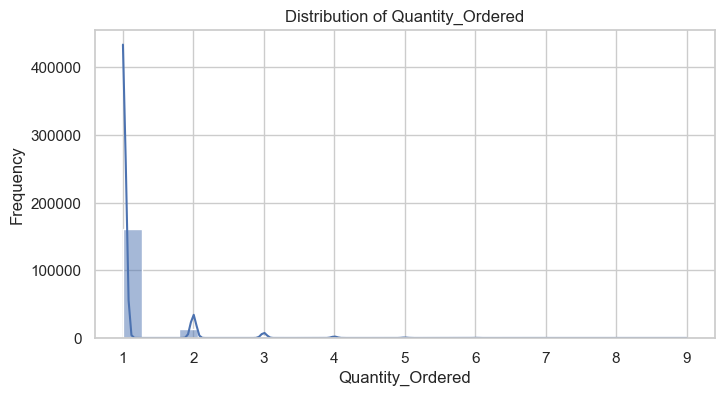


Univariate Analysis for Price_Each:
count    178437.000000
mean        187.611323
std         335.317522
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64


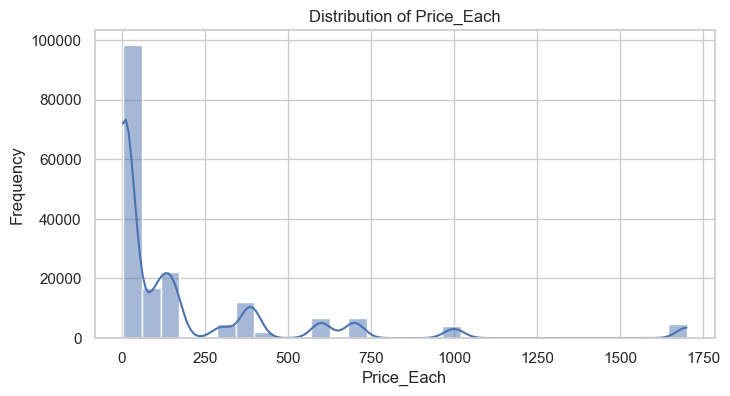


Univariate Analysis for Sales:
count      178437.0
mean     188.703012
std      335.513389
min            2.99
25%           11.95
50%           14.95
75%           150.0
max          3400.0
Name: Sales, dtype: Float64


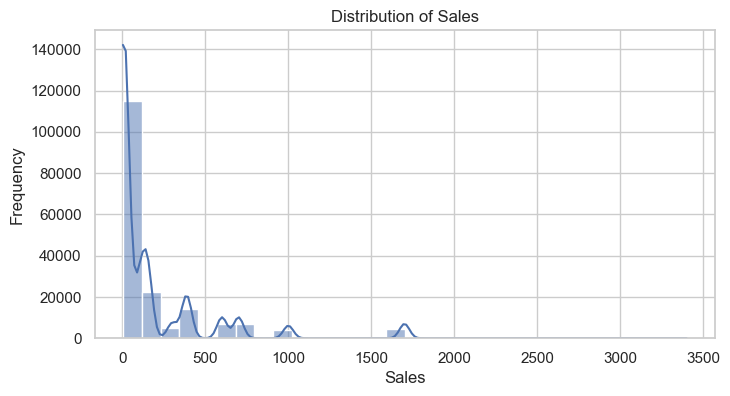


Univariate Analysis for Month:
count    178437.000000
mean          7.061495
std           3.502690
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: Month, dtype: float64


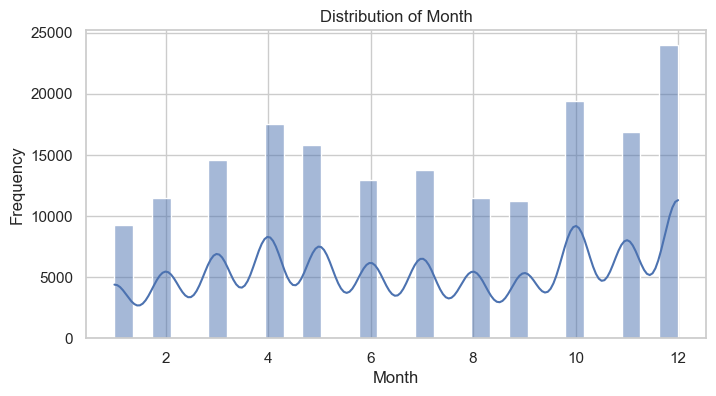

In [61]:
# Set plot style
sns.set(style="whitegrid")

# List of numeric columns (excluding 'Order_ID')
numeric_columns = ['Quantity_Ordered', 'Price_Each', 'Sales', 'Month']

# Univariate analysis for each numeric column
for col in numeric_columns:
    print(f"\nUnivariate Analysis for {col}:")
    
    # Display basic statistics
    print(combined_df[col].describe())
    
    # Create a histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(combined_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Observations 
##### quantity ordered
The distribution of `Quantity_Ordered` shows a highly skewed pattern, where the majority of transactions involve the purchase of just 1 item, as indicated by a sharp peak near 1. The frequency of orders drops significantly for quantities greater than 1, with very few transactions involving more than 3 items. Orders of 5 or more items are rare, making these higher quantities outliers in the data. This suggests that most customers tend to purchase single items in their transactions.

##### Price_Each
The distribution of `Price_Each` is highly right-skewed, with the majority of items priced under $150, as shown by the dominant peak at the lower end of the X-axis. There are smaller peaks around $200, $300, $500, and $750, indicating notable frequencies of items priced at these levels. Beyond $1000, the frequency of items drops off significantly, with very few high-priced items exceeding $1500. This suggests that most products in the dataset are priced low, while higher-priced items are less frequent.

##### Sales
The distribution of `Sales` is heavily right-skewed, with the majority of sales concentrated under $200, as reflected by the high peak at the lower end of the X-axis. There are smaller peaks around $300, $500, and $1000, indicating occasional higher sales values at these levels. Sales above $1500 are rare, and values exceeding $2000 are even less frequent. This suggests that most transactions generate lower sales amounts, with high-value sales occurring infrequently.

##### Month
The distribution of orders by month reveals that December (12th month) has the highest number of orders, followed by October (10th month) and April (4th month). In contrast, January (1st month) has the fewest orders, making it the month with the lowest order volume.

#### Bivariate Analysis 

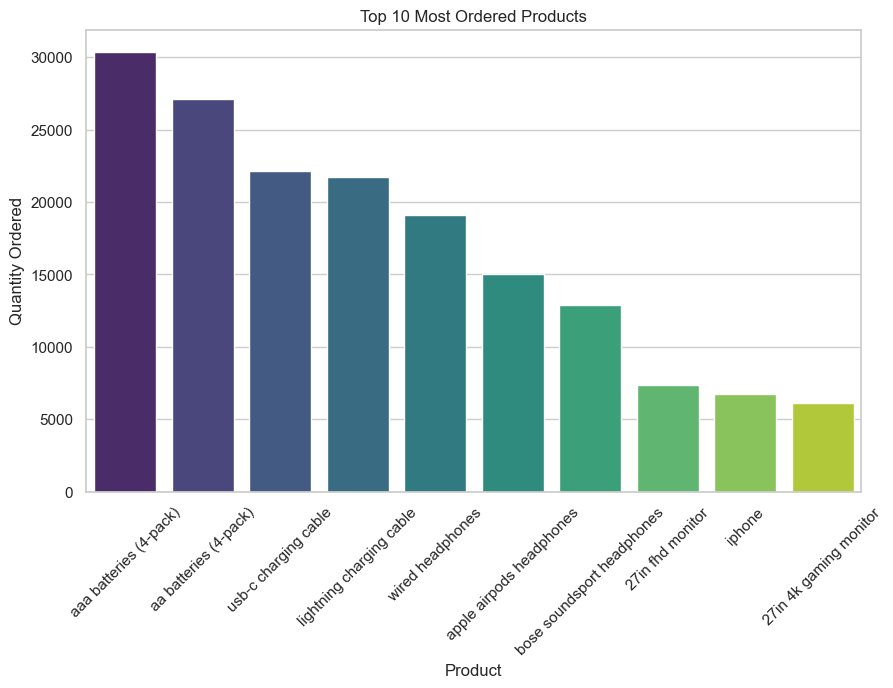

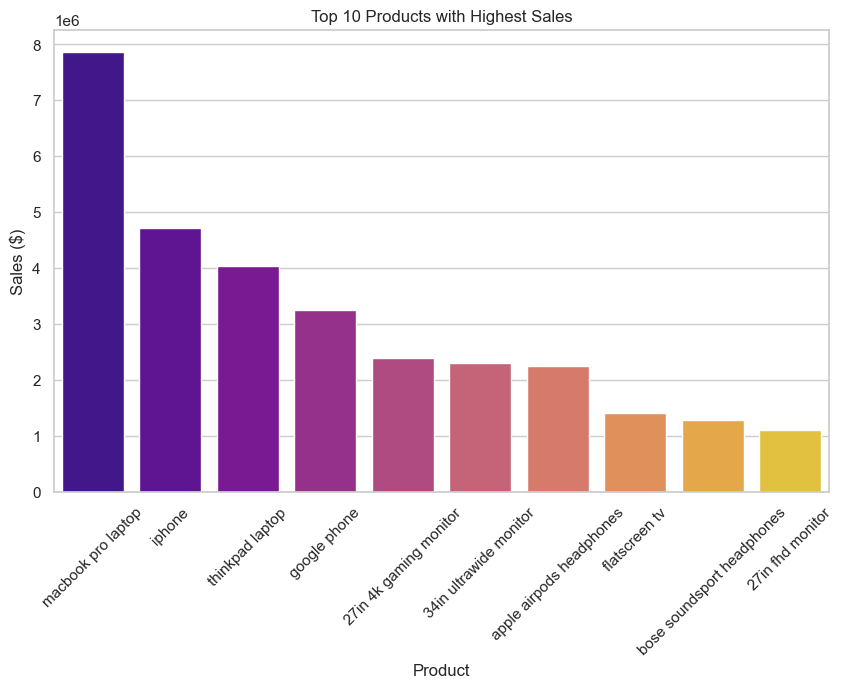

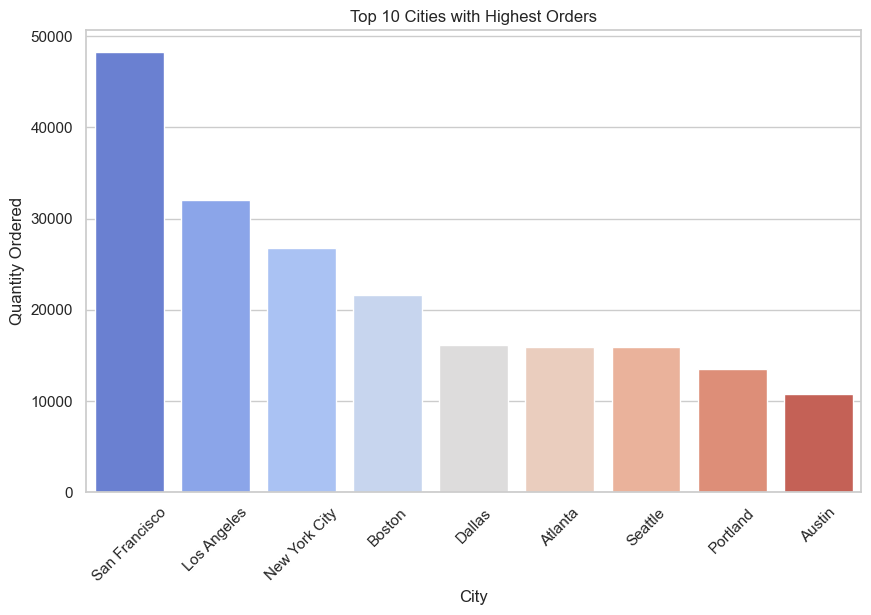

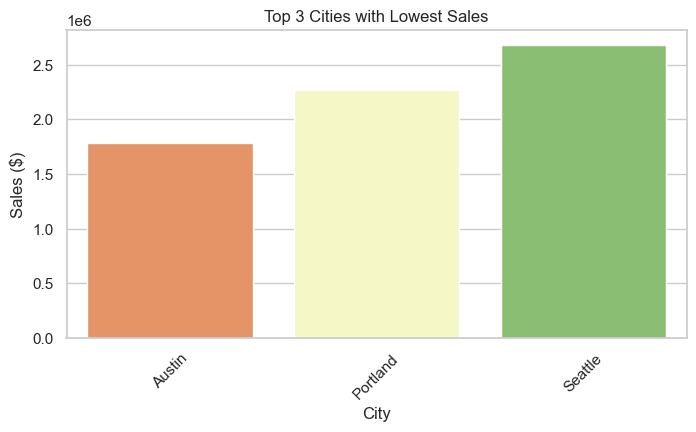

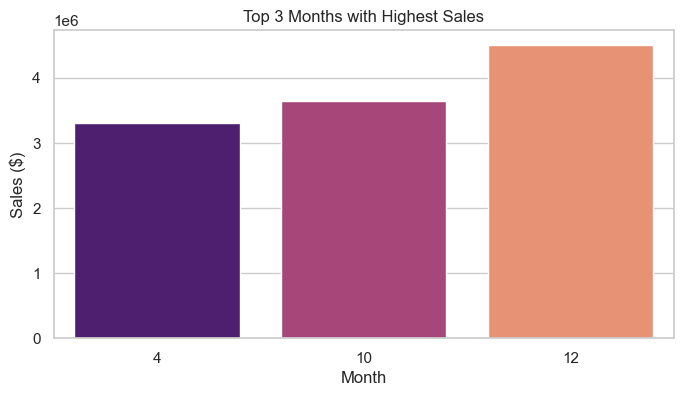

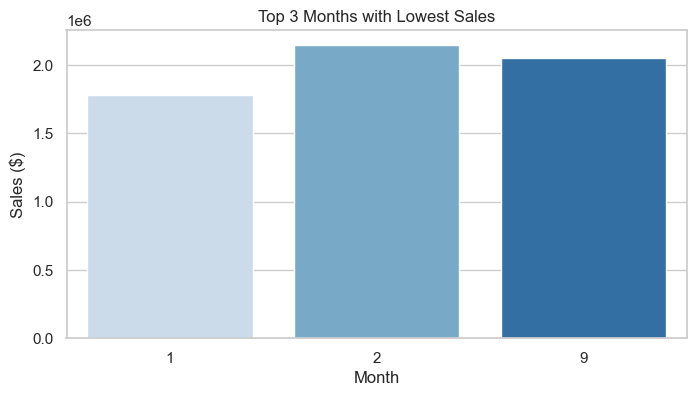

In [62]:
# Set plot style
sns.set(style="whitegrid")

# Bivariate Analysis - Most ordered product
most_ordered_products = combined_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_ordered_products.index[:10], y=most_ordered_products.values[:10], palette="viridis")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 10 products with the highest sales
top_sales_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_products.index[:10], y=top_sales_products.values[:10], palette="plasma")
plt.title('Top 10 Products with Highest Sales')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 10 cities with the highest orders
top_cities_orders = combined_df.groupby('City')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_orders.index[:10], y=top_cities_orders.values[:10], palette="coolwarm")
plt.title('Top 10 Cities with Highest Orders')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 3 cities with the lowest sales
lowest_sales_cities = combined_df.groupby('City')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_cities.index, y=lowest_sales_cities.values, palette="RdYlGn")
plt.title('Top 3 Cities with Lowest Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 3 months with the highest sales
top_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_sales_months.index, y=top_sales_months.values, palette="magma")
plt.title('Top 3 Months with Highest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

# Top 3 months with the lowest sales
lowest_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_months.index, y=lowest_sales_months.values, palette="Blues")
plt.title('Top 3 Months with Lowest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()


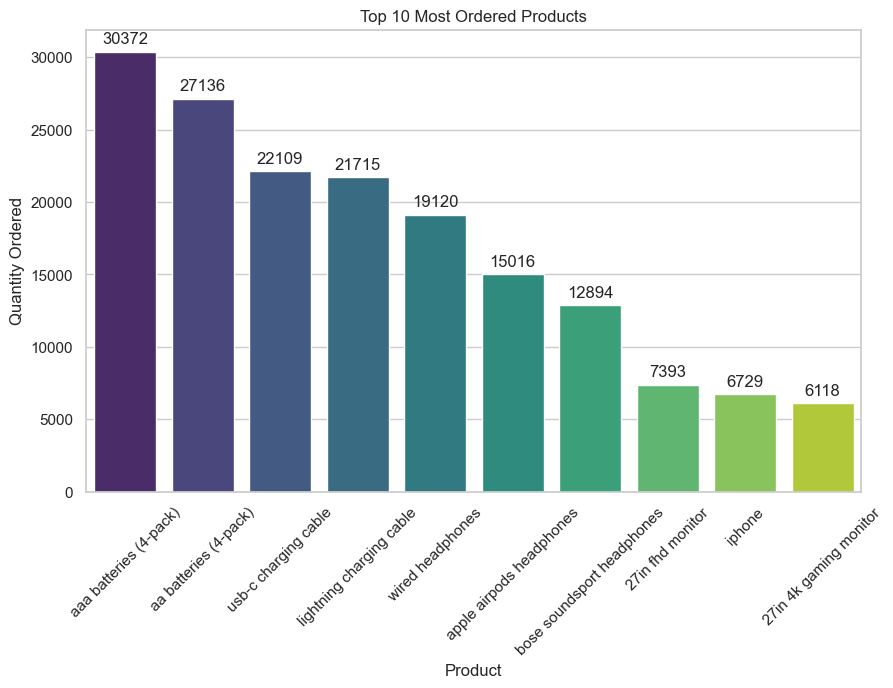

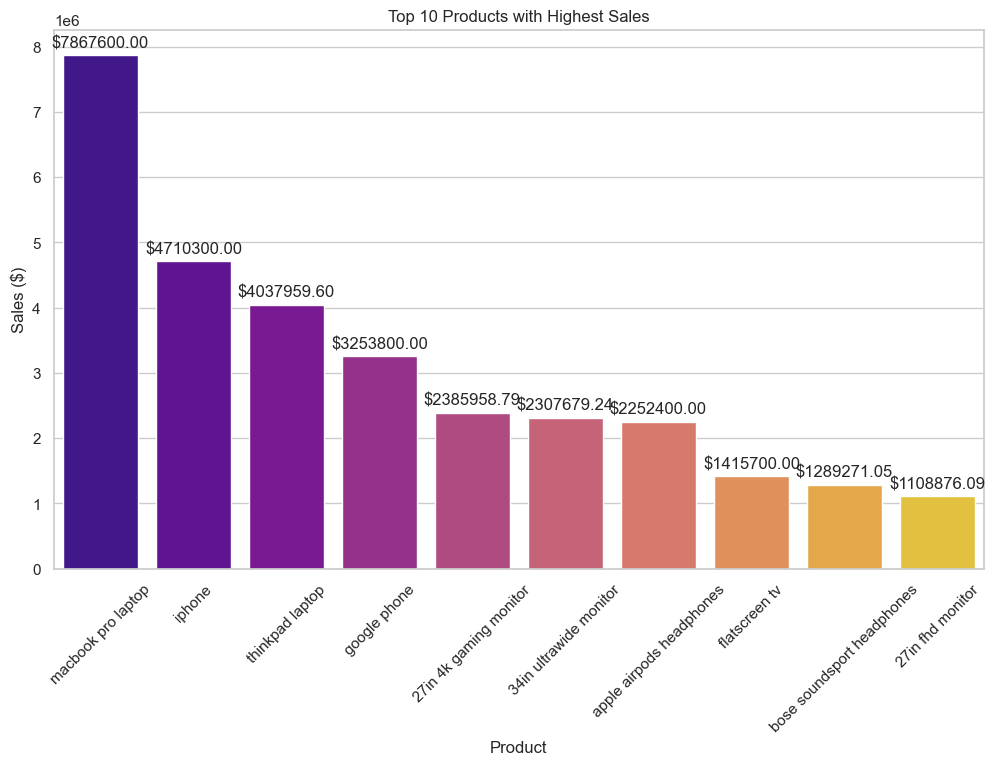

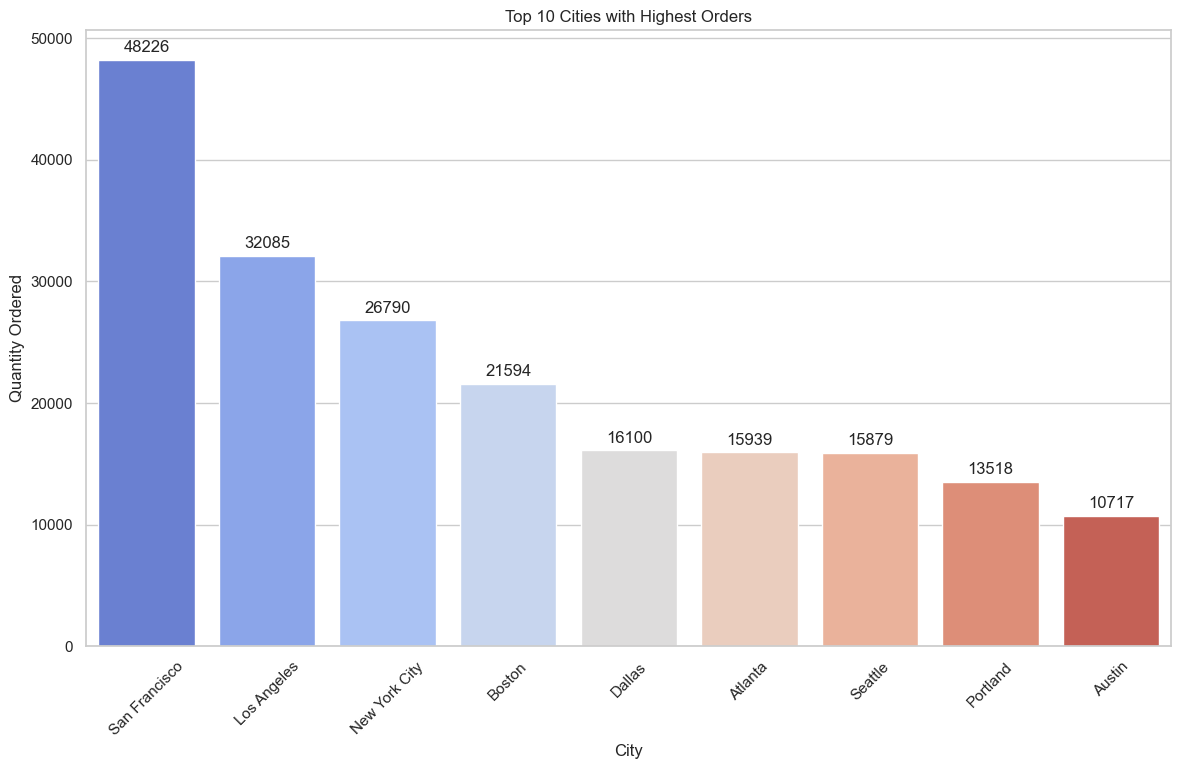

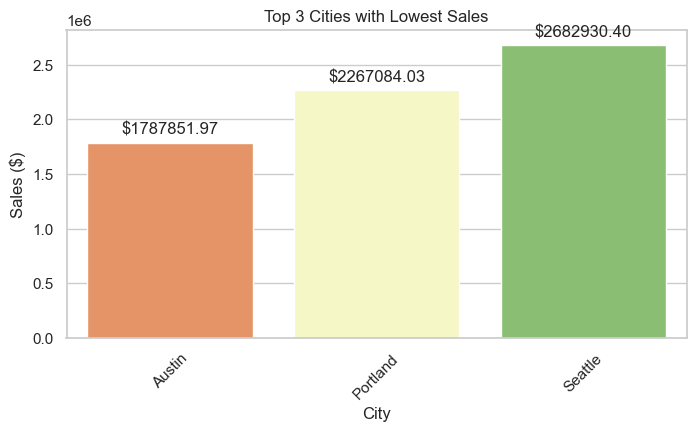

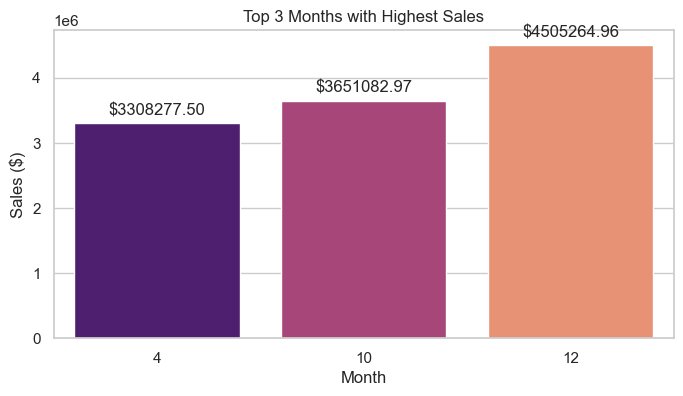

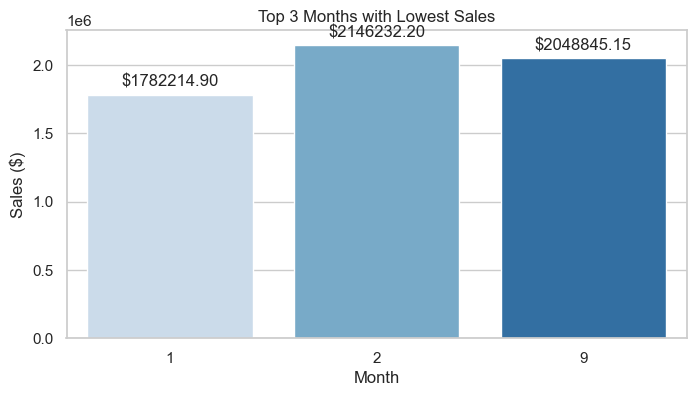

In [63]:
# Set plot style
sns.set(style="whitegrid")

# Bivariate Analysis - Most ordered product
most_ordered_products = combined_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=most_ordered_products.index[:10], y=most_ordered_products.values[:10], palette="viridis")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Top 10 products with the highest sales
top_sales_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_sales_products.index[:10], y=top_sales_products.values[:10], palette="plasma")
plt.title('Top 10 Products with Highest Sales')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Top 10 cities with the highest orders
top_cities_orders = combined_df.groupby('City')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_cities_orders.index[:10], y=top_cities_orders.values[:10], palette="coolwarm")
plt.title('Top 10 Cities with Highest Orders')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Top 3 cities with the lowest sales
lowest_sales_cities = combined_df.groupby('City')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=lowest_sales_cities.index, y=lowest_sales_cities.values, palette="RdYlGn")
plt.title('Top 3 Cities with Lowest Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Top 3 months with the highest sales
top_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_sales_months.index, y=top_sales_months.values, palette="magma")
plt.title('Top 3 Months with Highest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()

# Top 3 months with the lowest sales
lowest_sales_months = combined_df.groupby('Month')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=lowest_sales_months.index, y=lowest_sales_months.values, palette="Blues")
plt.title('Top 3 Months with Lowest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()


### Observations
#### Most ordered Product 
- aaa battery is the most ordered product with Approximately 30000 orders, followed by the aa battery with over 25000 orders
#### Product with the highest sales 
- The product with the highest sales is the macbook accounting for $7867600
#### city with the highest order 
- San francisco happens to be the city were most orders were delivered accounting for 48226 ordes.
#### city with the lowest sales 
- austin is the city with the lowest sales 
#### Month with the highest and lowest sales 
- The 12th month happen to be the month were most sales were made probably due to the chrismas holidays and black friday while 1st month is the month with the lowest sales 




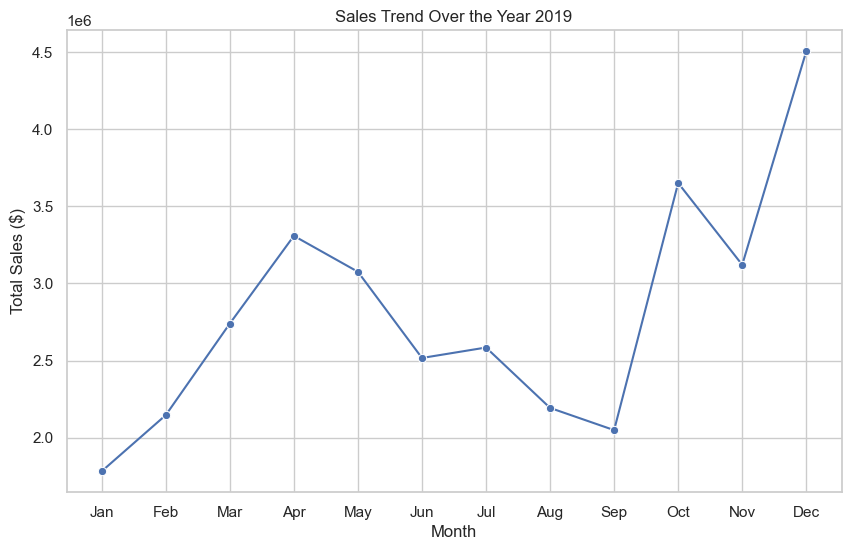

In [64]:
# Extract month and day to analyze sales trend over time
# combined_df['Month'] = combined_df['Order_Date'].dt.month
# combined_df['Day'] = combined_df['Order_Date'].dt.day

# Group by month to get the total sales for each month
monthly_sales = combined_df.groupby('Month')['Sales'].sum()

# Plot sales trend over the year 2019
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.title('Sales Trend Over the Year 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The graph shows a  distinct fluctuations in monthly sales. From January to April, sales steadily increase, starting at $1.78 million in January and reaching a peak of $3.31 million in April. However, after April, sales begin to decline, dropping consistently until they hit the lowest point of $2.05 million in September. Following this, there is a sharp rebound october , with sales surging and reaching the highest figure of $4.51 million in December. This pattern suggests strong seasonality, with sales peaking toward the end of the year, likely due to holiday shopping, while the summer months experience a noticeable dip, possibly reflecting a slower sales period.

In [65]:
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Price_Level,Sales,Order_Date,Quarter,Month,Week,Purchase_Address,City
0,141234,iphone,1,700.000000,High-Level,700.0,2019-01-22,2019Q1,1,4,"944 Walnut St, Boston, MA 02215",Boston
1,141235,lightning charging cable,1,14.950000,Basic-Level,14.95,2019-01-28,2019Q1,1,5,"185 Maple St, Portland, OR 97035",Portland
2,141236,wired headphones,2,11.990000,Basic-Level,23.98,2019-01-17,2019Q1,1,3,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237,27in fhd monitor,1,149.990000,High-Level,149.99,2019-01-05,2019Q1,1,1,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238,wired headphones,1,11.990000,Basic-Level,11.99,2019-01-25,2019Q1,1,4,"387 10th St, Austin, TX 73301",Austin
...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,lightning charging cable,1,14.950000,Basic-Level,14.95,2019-12-19,2019Q4,12,51,"14 Madison St, San Francisco, CA 94016",San Francisco
25113,319667,aa batteries (4-pack),2,3.840000,Basic-Level,7.68,2019-12-19,2019Q4,12,51,"549 Willow St, Los Angeles, CA 90001",Los Angeles
25114,319668,vareebadd phone,1,400.000000,High-Level,400.0,2019-12-19,2019Q4,12,51,"273 Wilson St, Seattle, WA 98101",Seattle
25115,319669,wired headphones,1,11.990000,Basic-Level,11.99,2019-12-19,2019Q4,12,51,"778 River St, Dallas, TX 75001",Dallas


###  Business Questions

1. How much revenue was generated in 2019?

In [66]:
# Calculate total revenue in 2019
total_revenue = combined_df['Sales'].sum()
print(f"Total revenue generated in 2019: ${total_revenue:.2f}")


Total revenue generated in 2019: $33671599.38


The total revenue generated in 2019 was Thirty-three million six hundred seventy-one thousand five hundred ninety-nine dollars and thirty-eight cents.

2. Are there any seasonal trends in the sales data?

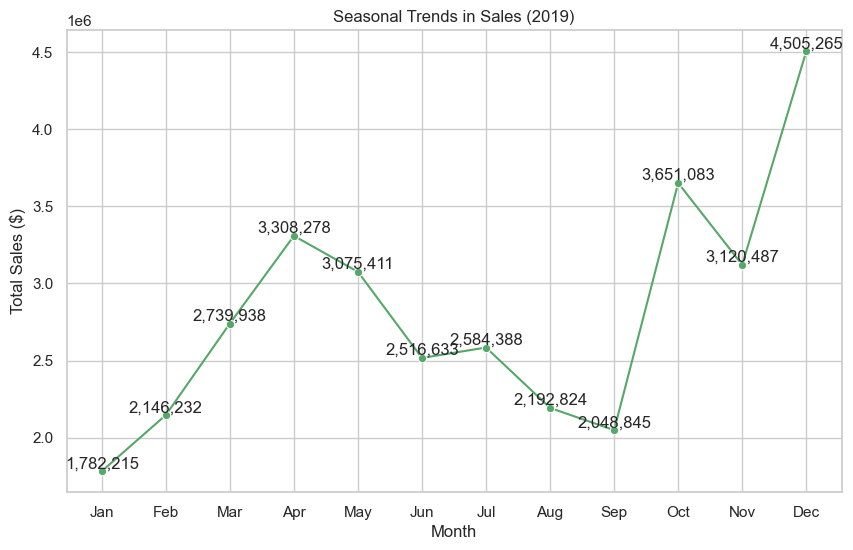

In [67]:
# Group by month to calculate total sales for each month
monthly_sales = combined_df.groupby('Month')['Sales'].sum()

# Plot monthly sales to observe seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='g')

# Annotate each point with its value
for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')  # Format the labels with commas and no decimal places

# Set the title and labels for the plot
plt.title('Seasonal Trends in Sales (2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()


The graph shows a  distinct fluctuations in monthly sales. From January to April, sales steadily increase, starting at $1.78 million in January and reaching a peak of $3.31 million in April. However, after April, sales begin to decline, dropping consistently until they hit the lowest point of $2.05 million in September. Following this, there is a sharp rebound october , with sales surging and reaching the highest figure of $4.51 million in December. This pattern suggests strong seasonality, with sales peaking toward the end of the year, likely due to holiday shopping, while the summer months experience a noticeable dip, possibly reflecting a slower sales period.

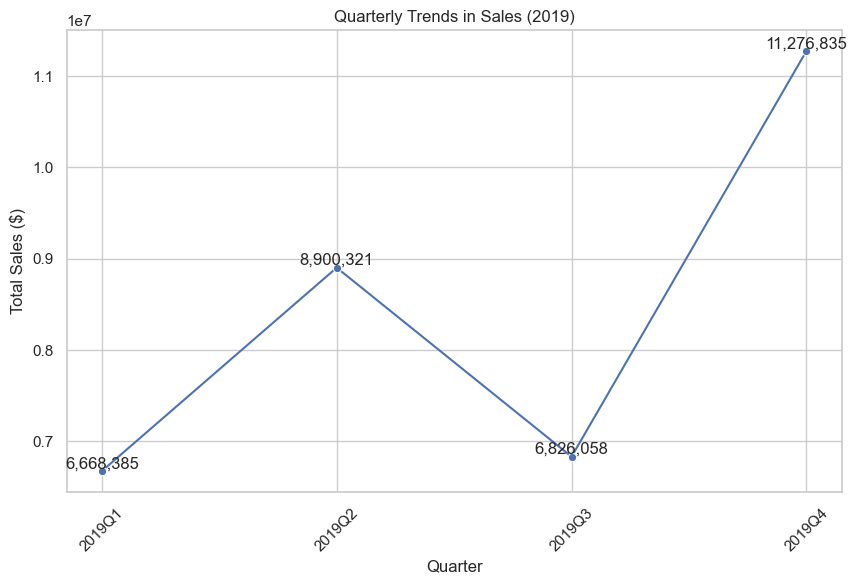

In [68]:
# Group by quarter to calculate total sales for each quarter
quarterly_sales = combined_df.groupby('Quarter')['Sales'].sum()

# Plot quarterly sales to observe trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterly_sales.index.astype(str), y=quarterly_sales.values, marker='o', color='b')

# Annotate each point with its value
for x, y in zip(quarterly_sales.index.astype(str), quarterly_sales.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')  # Format the labels with commas and no decimal places

# Set the title and labels for the plot
plt.title('Quarterly Trends in Sales (2019)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


The graph reveals clear fluctuations in quarterly sales for 2019. Sales showed a steady upward trend from Q1 to Q2, rising from approximately $6.67 million to around $8.9 million. However, a notable decline occurred between Q2 and Q3, with sales dropping back to approximately $6.8 million. This was followed by a strong recovery in Q4, where sales rebounded significantly, reaching approximately $11.3 million.

3. Which products performed the best and worst?

Best performing product:
Product
macbook pro laptop    7867600.0
Name: Sales, dtype: Float64

Worst performing product:
Product
aaa batteries (4-pack)    90812.280158
Name: Sales, dtype: Float64


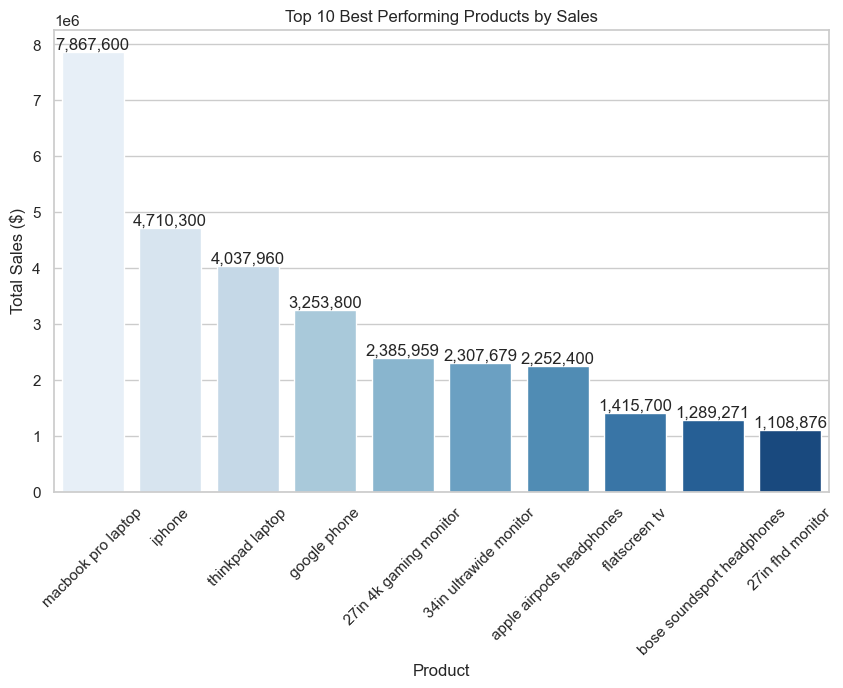

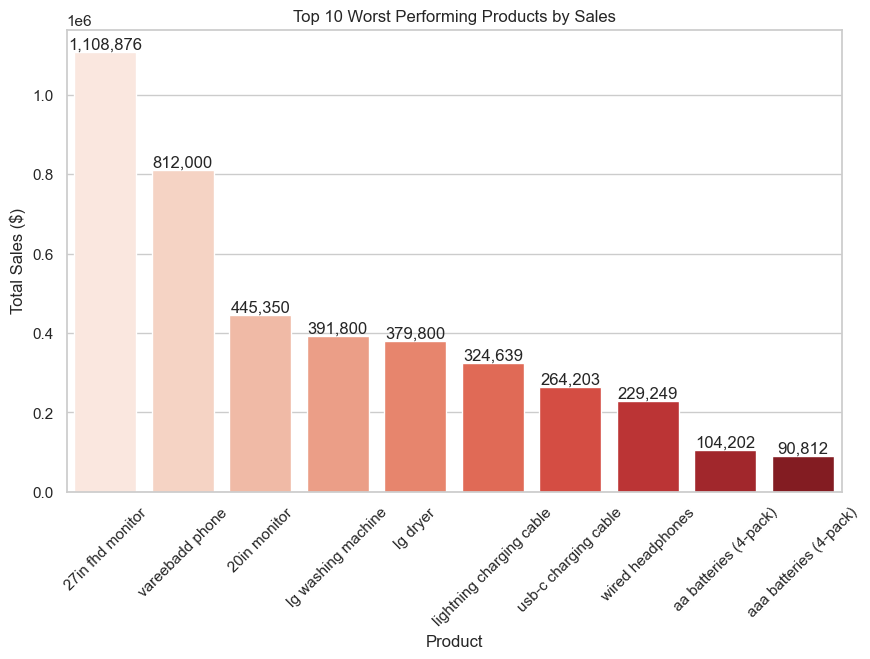

In [69]:
# Best performing products by sales
best_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

print("Best performing product:")
print(best_products.head(1))

print("\nWorst performing product:")
print(best_products.tail(1))

# Visualize top 10 best performing products by sales with labels
plt.figure(figsize=(10, 6))
sns.barplot(x=best_products.index[:10], y=best_products.values[:10], palette="Blues")

# Add labels on each bar
for x, y in enumerate(best_products.values[:10]):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Best Performing Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Visualize top 10 worst performing products by sales with labels
plt.figure(figsize=(10, 6))
sns.barplot(x=best_products.index[-10:], y=best_products.values[-10:], palette="Reds")

# Add labels on each bar
for x, y in enumerate(best_products.values[-10:]):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Worst Performing Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


The MacBook stands out as the top-performing product, generating total sales of $7,867,600. It is followed by iPhones with $4,710,300 in sales, and the ThinkPad laptop, which contributed $4,037,960. In contrast, AA and AAA batteries were the lowest-performing products, with total sales of $104,202 and $90,812, respectively. This performance gap is likely due to the higher price points of products like MacBooks, iPhones, and ThinkPads, which fall into high-level categories, whereas the batteries, being lower-priced basic items, naturally generate lower sales volumes.

(np.float64(-1.0999990424478394),
 np.float64(1.0999832293621177),
 np.float64(-1.0999997736225242),
 np.float64(1.0999999892201202))

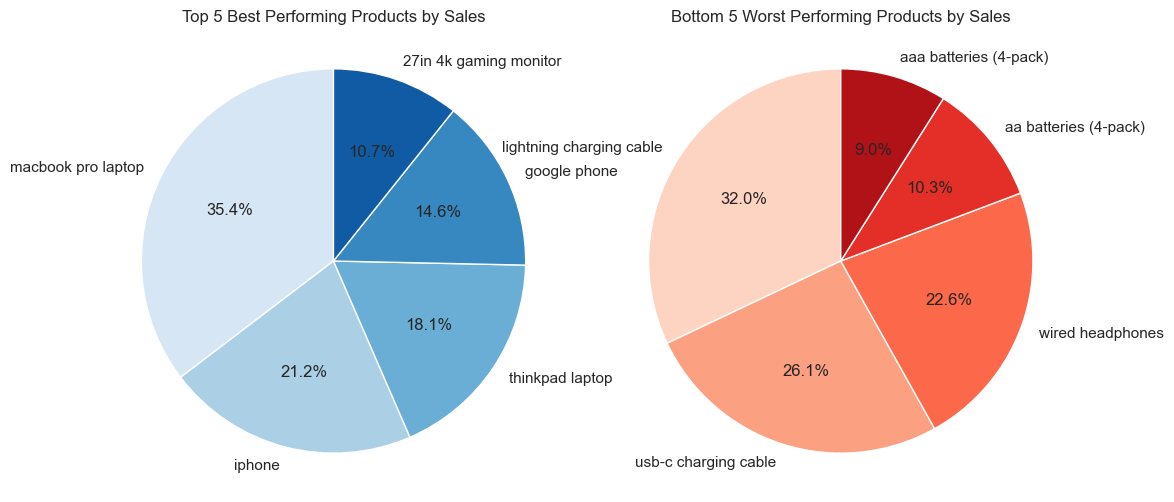

In [70]:
# Best performing products by sales
best_products = combined_df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Get the top 5 and bottom 5 performing products
top_5_products = best_products.head(5)
bottom_5_products = best_products.tail(5)

# Plot pie chart for the top 5 best performing products
plt.figure(figsize=(12, 6))

# Plot for top 5 products
plt.subplot(1, 2, 1)
plt.pie(top_5_products, labels=top_5_products.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues', len(top_5_products)))
plt.title('Top 5 Best Performing Products by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for bottom 5 products
plt.subplot(1, 2, 2)
plt.pie(bottom_5_products, labels=bottom_5_products.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds', len(bottom_5_products)))
plt.title('Bottom 5 Worst Performing Products by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn


4. How do sales in different months and weeks compare?

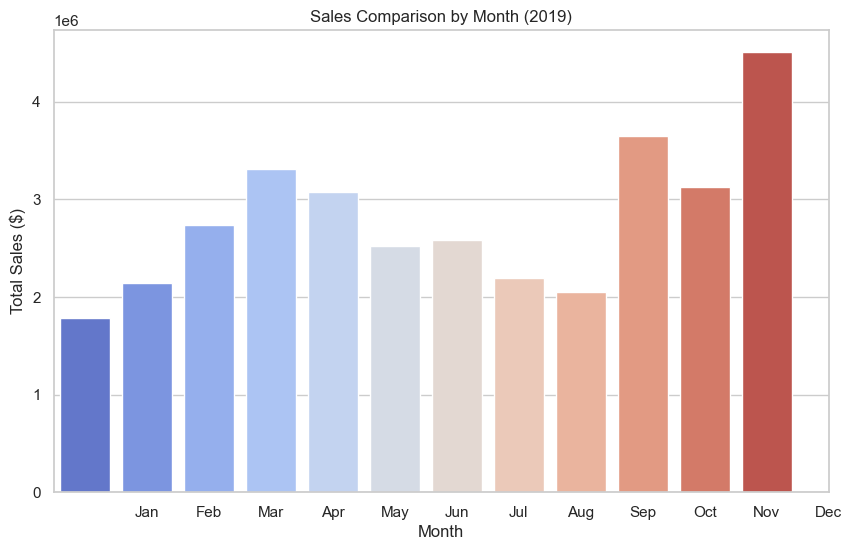

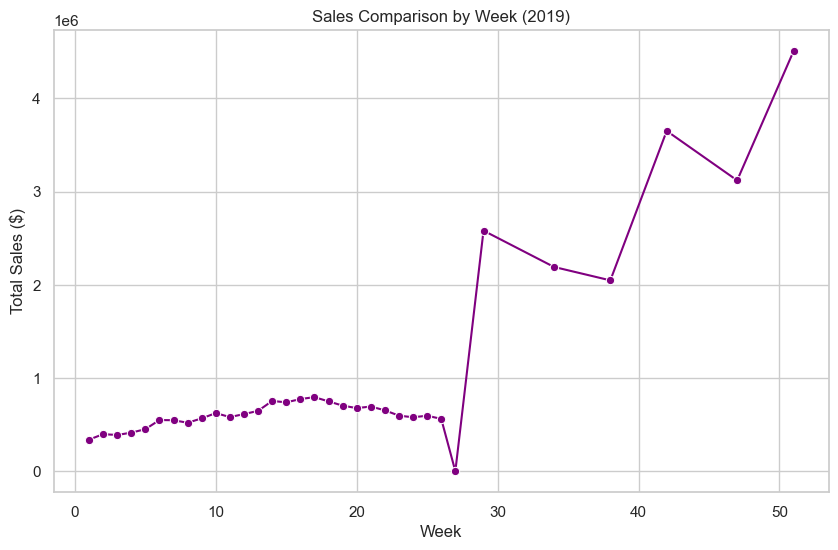

In [71]:
# Group by month and calculate sales
monthly_sales = combined_df.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.title('Sales Comparison by Month (2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Group by week and calculate sales
weekly_sales = combined_df.groupby('Week')['Sales'].sum()

# Plot weekly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o', color='purple')
plt.title('Sales Comparison by Week (2019)')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


The sales comparison across different months and weeks in 2019 reveals distinct trends. The monthly analysis shows a steady increase in sales from January, starting at around $1.8 million, and peaking towards the end of the year. Sales rise consistently in the first two quarters, with March and April reaching approximately $3 million. The middle of the year, specifically June, July, and August, experiences a slight decline, with sales stabilizing around $2.5 million. However, a significant surge is observed in November, where sales peak at $4.5 million, likely driven by seasonal shopping events.

The weekly sales trend follows a relatively flat pattern in the first half of the year, remaining below $1 million until week 27. A sharp increase occurs in week 28, where sales jump to around $3 million, followed by fluctuations but with a general upward trajectory. By week 50, sales exceed $4 million, aligning with the high performance seen in November and December.

5. Which cities received the most product deliveries?


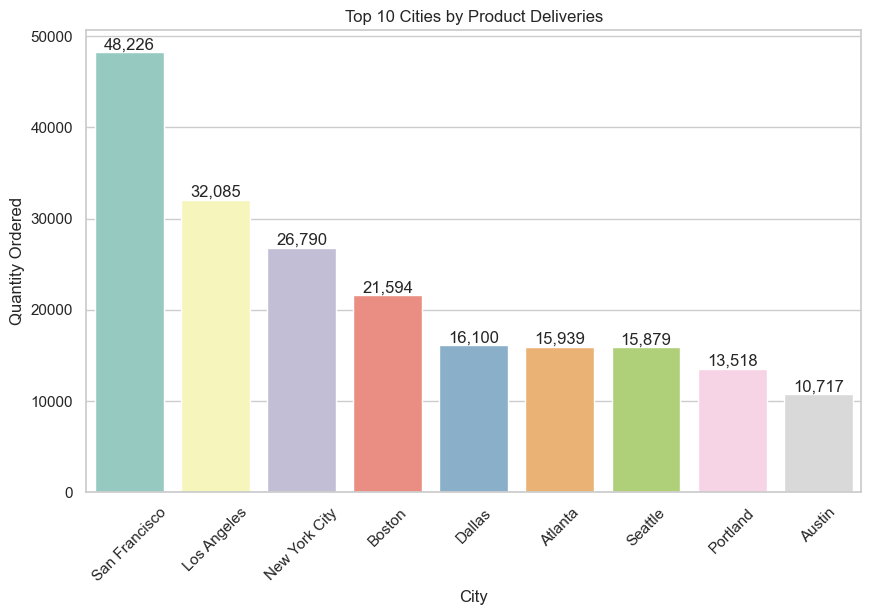

In [72]:
# Group by city and calculate the total quantity ordered
city_deliveries = combined_df.groupby('City')['Quantity_Ordered'].sum().sort_values(ascending=False)

# Plot top 10 cities by deliveries with labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=city_deliveries.index[:10], y=city_deliveries.values[:10], palette="Set3")

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Cities by Product Deliveries')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


The graph highlights the top 10 cities by product deliveries, with San Francisco leading at 48,226 deliveries. Los Angeles follows with 32,085, and New York comes in third with 26,790. This distribution indicates a significant concentration of deliveries in San Francisco, raising questions about what factors, such as population density, consumer behavior, or regional demand, might be driving this disparity. Further analysis could help uncover the underlying drivers behind the high delivery volumes in these cities.

6. How do different product categories perform in terms of revenue and quantity sold?


### create categories for each products

In [73]:
# Define the product-category mapping
product_category_map = {
    'iphone': 'Mobile Phones',
    'lightning charging cable': 'Accessories',
    'wired headphones': 'Accessories',
    '27in fhd monitor': 'Electronics',
    'aaa batteries (4-pack)': 'Accessories',
    '27in 4k gaming monitor': 'Electronics',
    'usb-c charging cable': 'Accessories',
    'bose soundsport headphones': 'Accessories',
    'apple airpods headphones': 'Accessories',
    'macbook pro laptop': 'Electronics',
    'flatscreen tv': 'Home Appliances',
    'vareebadd phone': 'Mobile Phones',
    'aa batteries (4-pack)': 'Accessories',
    'google phone': 'Mobile Phones',
    '20in monitor': 'Electronics',
    '34in ultrawide monitor': 'Electronics',
    'thinkpad laptop': 'Electronics',
    'lg dryer': 'Home Appliances',
    'lg washing machine': 'Home Appliances'
}

# Map the 'Product' column to its category
combined_df['Product_Category'] = combined_df['Product'].str.lower().map(product_category_map)

# Insert the 'Category' column next to the 'Product' column
combined_df.insert(combined_df.columns.get_loc('Product') + 1, 'Product_Category', combined_df.pop('Product_Category'))

# Display the first few rows to verify
combined_df.head()


,Order_ID,Product,Product_Category,Quantity_Ordered,Price_Each,Price_Level,Sales,Order_Date,Quarter,Month,Week,Purchase_Address,City
0,141234,iphone,Mobile Phones,1,700.00,High-Level,700.0,2019-01-22,2019Q1,1,4,"944 Walnut St, Boston, MA 02215",Boston
1,141235,lightning charging cable,Accessories,1,14.95,Basic-Level,14.95,2019-01-28,2019Q1,1,5,"185 Maple St, Portland, OR 97035",Portland
2,141236,wired headphones,Accessories,2,11.99,Basic-Level,23.98,2019-01-17,2019Q1,1,3,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237,27in fhd monitor,Electronics,1,149.99,High-Level,149.99,2019-01-05,2019Q1,1,1,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238,wired headphones,Accessories,1,11.99,Basic-Level,11.99,2019-01-25,2019Q1,1,4,"387 10th St, Austin, TX 73301",Austin


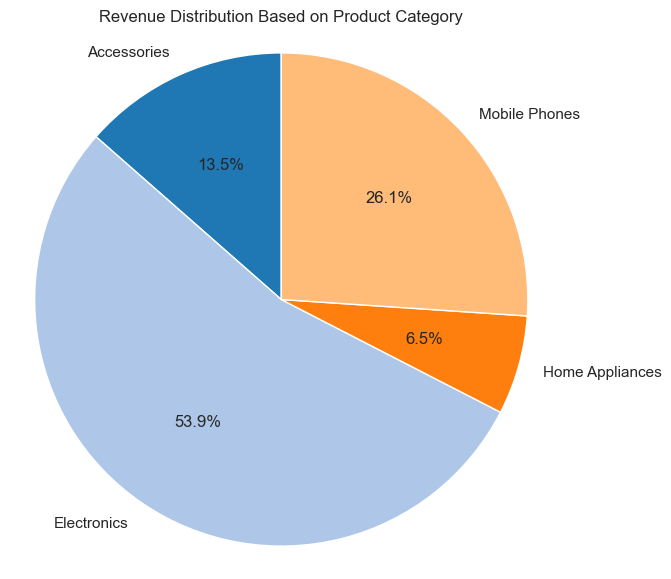

In [74]:
# Group by 'Product_Category' and sum the sales to get total revenue for each category
revenue_by_product_categories = combined_df.groupby("Product_Category")["Sales"].sum()

# Generate a color palette with the same number of colors as product categories
colors = plt.get_cmap('tab20')(range(len(revenue_by_product_categories)))

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(revenue_by_product_categories, 
        labels=revenue_by_product_categories.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors)

# Add a title
plt.title('Revenue Distribution Based on Product Category')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The products were categorized into accessories, mobile phones, electronics, and home appliances. As depicted in the pie chart, electronics contributed the largest share, accounting for 53.9% of the total revenue. Mobile phones followed with 26.1%, while accessories and home appliances contributed 13.5% and 6.5%, respectively. This breakdown highlights the dominant role of electronics in revenue generation, suggesting a key focus area for future sales strategies.

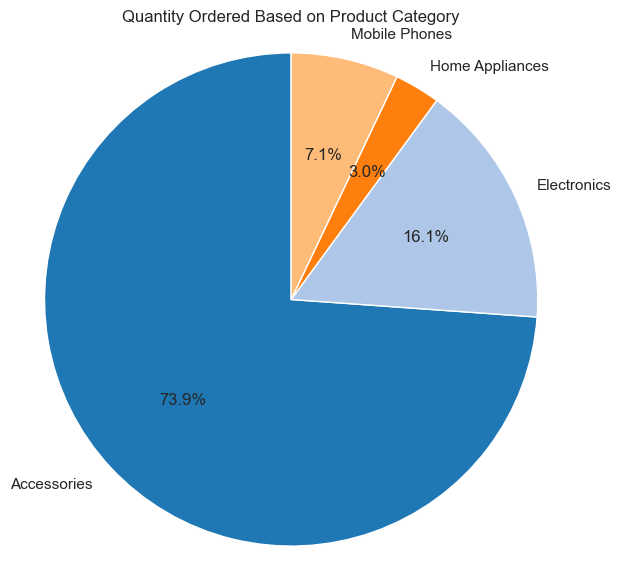

In [79]:
# Group by 'Product_Category' and sum the sales to get total revenue for each category
quantity_by_product_categories = combined_df.groupby("Product_Category")["Quantity_Ordered"].sum()

# Generate a color palette with the same number of colors as product categories
colors = plt.get_cmap('tab20')(range(len(quantity_by_product_categories)))

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_product_categories, 
        labels=quantity_by_product_categories.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors)

# Add a title
plt.title('Quantity Ordered Based on Product Category')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Accessories made up the majority of products ordered, accounting for 73.9% of total orders. Electronics followed with 16.1%, while mobile phones and home appliances contributed 7.1% and 3%, respectively. This distribution indicates a significant demand for accessories, which may be driven by their lower price points or wider usage.

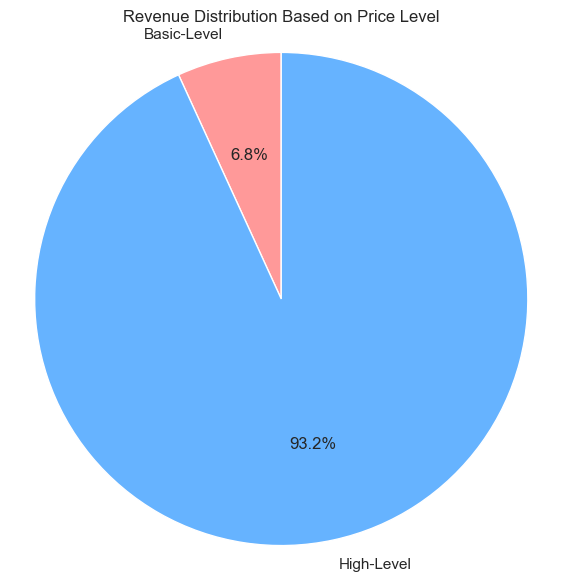

In [76]:
# Group by 'Price_Level' and sum the 'Sales' to get total revenue for each price level
quantity_by_price_level = combined_df.groupby('Price_Level')['Sales'].sum()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_price_level, labels=quantity_by_price_level.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Add a title
plt.title('Revenue Distribution Based on Price Level')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

High-level priced products (≥ $99) contributed significantly, accounting for 93.2% of total sales revenue, while basic-level priced products (< $99) made up the remaining 6.8%. This highlights the strong revenue impact of premium-priced items, indicating that higher-priced products are the main drivers of revenue.

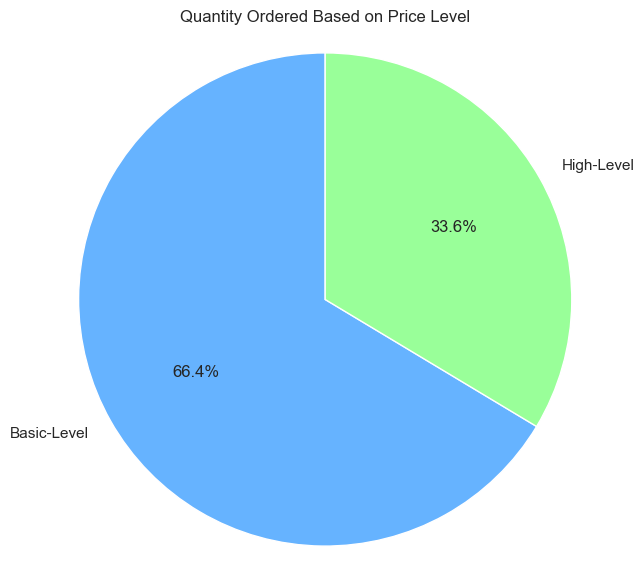

In [77]:
# Group by 'Price_Level' and sum up the 'Quantity_Ordered' to get total quantities for each price level
quantity_by_price_level = combined_df.groupby('Price_Level')['Quantity_Ordered'].sum()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_price_level, labels=quantity_by_price_level.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

# title
plt.title('Quantity Ordered Based on Price Level')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Basic-level priced products were the most frequently ordered, making up 66.4% of total orders, while high-level priced products accounted for 33.6%. Despite generating less revenue, basic-level products dominate in terms of volume, suggesting that affordability plays a key role in driving customer purchases, while high-level priced items contribute more to overall revenue despite fewer orders.

Convert the dataframe to a csv file 

In [78]:
# Convert the DataFrame to a CSV file
# combined_df.to_csv('transactional_data.csv', index=False)